# Mortality and hospital beds in Spain

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [1]:
# Importing libraries
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

In this proyect we will make a comparison between the mortality rates and the number of public hospital beds available in the different regions of Spain.

In order to do this, we will look for three dataset:
- A dataset with the information of all public hospitals. Information which includes number of beds by hospitals and the region where they are located.
- A dataset including the mortality rate (it is calculated in deaths by 1000 inhabitants).
- A dataset with the population number in each region. This information will be necessary in order to compare previous data.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: Excel file

Method: The data was gathered by programmatical download from the [Spanish National Hospital Cataloge](https://www.sanidad.gob.es/ciudadanos/prestaciones/centrosServiciosSNS/hospitales/)

Dataset variables:

*  CCN: Normaliced REGCESS center code
*  CODCNH: Historical assign center code
*  Nombre Centro: Center name
*  Dirección: Hospital address
*  Teléfono: Hospital telephone
*  Cód. Municipio: Municipality code
*  Municipio: Municipality
*  Cód. Provincia: Province code
*  Provincia: Province
*  Cód. CCAA: Region code
*  CCAA: (abreviation of *Comunidad Autónoma*) Region
*  Código Postal: Post code
*  CAMAS: Number of beds
*  Cód. Clase de centro: Center class code
*  Clase de centro: Center class
*  Cód. Dep. Funcional: Functional dependency code
*  Dependencia Funcional: Functional dependency. It refers to the body or legal entity on which the hospital depends.
*  Forma parte del complejo: Part of a complex
*  CODIDCOM: Complex code
*  Nombre del complejo: Complex name
*  ALTA: Memebership
* Email: Contact email

In [2]:
#FILL IN 1st data gathering and loading method
url_hosp = 'https://www.sanidad.gob.es/ciudadanos/prestaciones/centrosServiciosSNS/hospitales/docs/CNH_2023.xlsx'
hosp = requests.get(url_hosp)
hosp.raise_for_status()

In [3]:
# Looking for the sheet name that we need
xl = pd.ExcelFile(hosp.content)
xl.sheet_names

['INFORMACIÓN PREVIA',
 'DIRECTORIO DE HOSPITALES',
 'ESTRUCTURA FUNCIONAL',
 'BAJAS DE HOSPITALES',
 'ALTAS DE HOSPITALES',
 'CCAA',
 'PROVINCIAS',
 'MUNICIPIOS',
 'CLASE DE CENTRO',
 'DEPENDENCIA FUNCIONAL']

In [4]:
# Creating a pandas dataframe
df_hosp = pd.read_excel(hosp.content, sheet_name='DIRECTORIO DE HOSPITALES')
df_hosp.head(3)

,CCN,CODCNH,Nombre Centro,Dirección,Teléfono,Cód. Municipio,Municipio,Cód. Provincia,Provincia,Cód. CCAA,...,CAMAS,Cód. Clase de Centro,Clase de Centro,Cód. Dep. Funcional,Dependencia Funcional,Forma parte Complejo,CODIDCOM,Nombre del Complejo,ALTA,Email
0,1531000730,310121,Hospital García Orcoyen,Calle Santa Soria 22 -,848435000,310977,Estella-Lizarra,31,Navarra,15,...,108,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,N,NaN,NaN,N,gerencia.areasalud.estella@navarra.es
1,1531000737,310044,Hospital San Juan De Dios,Calle Beloso Alto 3 -,948231800,312016,Pamplona/Iruña,31,Navarra,15,...,256,C11,Hospitales Generales,20,Privados,N,NaN,NaN,N,hsjdpamplona@ohsjd.es
2,1531000733,310060,Clínica Universidad De Navarra,Avenida Pio Si 36 -,948255400,312016,Pamplona/Iruña,31,Navarra,15,...,230,C11,Hospitales Generales,20,Privados,N,NaN,NaN,N,direccioncun@unav.es


#### Dataset 2

Type: CSV file

Method: Manual downloading file from [spanish government data](https://datos.gob.es/es/catalogo/ea0010587-tasa-bruta-de-mortalidad-por-comunidad-autonoma-anual-comunidades-autonomas-indicadores-demograficos-basicos-identificador-api-14451)

Dataset variables:

*   Comunidades y Ciudades Autónomas: Regions
*   1985-2021: Mortality rate by years (number of deaths by 1000 inhabitants)

In [5]:
#FILL IN 2nd data gathering and loading method
df_mort = pd.read_csv('raw_data/mortality.csv', sep='\t', header=0, encoding='ISO-8859-1')
df_mort.head(3)

,Comunidades y Ciudades Autónomas,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01 Andalucía,"7,79","7,74","7,73","7,86","7,88","8,02","8,07","7,80","8,08",...,"8,15","7,83","7,90","8,57","8,24","8,48","8,66","8,35","9,25","9,33"
1,02 Aragón,"9,56","9,56","9,24","9,44","9,72","9,77","10,07","9,58","10,12",...,"10,24","10,01","10,35","10,85","10,24","10,80","10,72","10,28","12,55","11,06"
2,"03 Asturias, Principado de","9,72","9,44","9,58","9,81","9,95","10,39","10,52","10,42","10,75",...,"12,28","11,97","12,15","12,98","12,73","12,77","12,93","12,64","14,33","13,25"


#### Dataset 3
Type: Json file

Method: programmatical download from [spanish government data](https://datos.gob.es/es/catalogo/ea0010587-poblacion-segun-comunidad-autonoma-y-provincia-y-tamano-del-municipio-identificador-api-tpx-poblacion_1827-cpv21_8952-l0-01006-px1)

From this file we will get the following variables:
*  name: Region/province name
*  region_code: code indicating wheater it is a region (CCAA), a province(PROV) or a national data (NAC)
*  section: code indicating the counted section of inhabitants number
*  population: total inhabitants number

In [6]:
# We get our data
url_inh = 'https://servicios.ine.es/wstempus/js/es/DATOS_TABLA/55875?tip=AM'
response = requests.get(url_inh)
response.raise_for_status()

In [7]:
# Loading data
response_json = json.loads(response.text)
response_json

[{'Nombre': 'Total Nacional, TOTAL, Personas',
  'MetaData': [{'Variable': {'Id': 349,
     'Nombre': 'Total Nacional',
     'Codigo': 'NAC'},
    'Nombre': 'Total Nacional',
    'Codigo': '00'},
   {'Variable': {'Nombre': 'Tamaño de municipio de residencia',
     'Codigo': 'tamanodemunicipioderesidencia'},
    'Nombre': 'TOTAL',
    'Codigo': 'total'},
   {'Variable': {'Nombre': 'Unidades de medida', 'Codigo': 'unidadesdemedida'},
    'Nombre': 'Personas',
    'Codigo': 'personas'}],
  'Data': [{'Valor': 47400798.0}]},
 {'Nombre': 'Total Nacional, Menos de 101 habitantes, Personas',
  'MetaData': [{'Variable': {'Id': 349,
     'Nombre': 'Total Nacional',
     'Codigo': 'NAC'},
    'Nombre': 'Total Nacional',
    'Codigo': '00'},
   {'Variable': {'Nombre': 'Tamaño de municipio de residencia',
     'Codigo': 'tamanodemunicipioderesidencia'},
    'Nombre': 'Menos de 101 habitantes',
    'Codigo': 'menosde101habitantes'},
   {'Variable': {'Nombre': 'Unidades de medida', 'Codigo': 'unidade

In [8]:
# We select the data we need from the json file and create a dataframe
names = []
region_code = []
select = []
inh = []

for i in range(len(response_json)):
    names.append(response_json[i]['MetaData'][0]['Nombre'])
    region_code.append(response_json[i]['MetaData'][0]['Variable']['Codigo'])
    select.append(response_json[i]['MetaData'][1]['Codigo'])
    inh.append(response_json[i]['Data'][0]['Valor'])

df_pop = pd.DataFrame({'name':names, 'region_code': region_code, 'section':select, 'population':inh})
df_pop.sample(8)

,name,region_code,section,population
592,06 Badajoz,PROV,de1001a2000habitantes,57880.0
193,"04 Balears, Illes",CCAA,menosde101habitantes,0.0
509,25 Lleida,PROV,de2001a5000habitantes,60980.0
147,44 Teruel,PROV,de501a1000habitantes,15489.0
222,05 Canarias,CCAA,de5001a10000habitante,139388.0
682,"13 Madrid, Comunidad de",CCAA,de100001a500000habitantes,1521770.0
80,21 Huelva,PROV,de20001a50000habitantes,160192.0
337,37 Salamanca,PROV,menosde101habitantes,5748.0


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [9]:
# We store our raw dataset 1 as csv
df_hosp.to_csv('raw_data/hospitals.csv')

In [10]:
# We store our raw dataset 3 as json file
with open('raw_data/population.json', 'w') as f:
    json.dump(response_json, f, indent = 1)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

We inspect our data visually in search of quality issues

In [11]:
#FILL IN - Inspecting the dataframe visually
df_hosp.sample(5)

,CCN,CODCNH,Nombre Centro,Dirección,Teléfono,Cód. Municipio,Municipio,Cód. Provincia,Provincia,Cód. CCAA,...,CAMAS,Cód. Clase de Centro,Clase de Centro,Cód. Dep. Funcional,Dependencia Funcional,Forma parte Complejo,CODIDCOM,Nombre del Complejo,ALTA,Email
243,1328000028,280133,Hospital Infantil Universitario Niño Jesús,Avenida De Menéndez Pelayo 65,915035900,280796,Madrid,28,Madrid,13,...,170,C12,Hospitales especializados,2,Servicios E Institutos De Salud De Las Comunid...,N,NaN,NaN,N,NaN
423,538000126,380223,Hospital Universitario Hospiten Bellevue,Calle Alemania 4,922368822;922383551,380282,Puerto de la Cruz,38,Santa Cruz De Tenerife,5,...,199,C11,Hospitales Generales,20,Privados,N,NaN,NaN,N,bellevue@hospiten.es
545,1046009450,460426,Centro Habilitado Ernest Lluch,Avenida Campanar 66,961244226,462508,València,46,Valencia,10,...,165,C190,Otros Centros con Internamiento,2,Servicios E Institutos De Salud De Las Comunid...,N,NaN,NaN,N,gerencia_lafe@gva.es
279,129001082,290108,"Hospital Dr. Gálvez, S.A.",Calle San Agustín 1,952224295,290672,Málaga,29,Málaga,1,...,62,C11,Hospitales Generales,20,Privados,N,NaN,NaN,N,gerente@hospitalgalvez.com
135,123000213,230079,Hospital San Agustín,Avenida San Cristóbal S/N,953024200,230559,Linares,23,Jaén,1,...,234,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,N,NaN,NaN,N,NaN


For each hospital we need data of the region (CCAA) and the number of beds (CAMAS), so we'll look for this columns and look at them

In [12]:
df_hosp.columns

Index(['CCN', 'CODCNH', 'Nombre Centro', 'Dirección', 'Teléfono',
       'Cód. Municipio', 'Municipio', 'Cód. Provincia', 'Provincia',
       'Cód. CCAA', 'CCAA', 'Código Postal', 'CAMAS', 'Cód. Clase de Centro',
       'Clase de Centro', 'Cód. Dep. Funcional', 'Dependencia Funcional',
       'Forma parte Complejo', 'CODIDCOM', 'Nombre del Complejo', 'ALTA',
       'Email'],
      dtype='object')

In [13]:
df_hosp[['CCAA', 'CAMAS']].sample(10)

,CCAA,CAMAS
598,Andalucía,15
773,Cataluña,401
230,Madrid,331
729,Cataluña,350
102,País Vasco,149
347,Aragón,1198
360,Ppdo. De Asturias,41
329,C. Foral De Navarra,21
57,Cataluña,23
685,Illes Balears,15


It seems that we have the information we were looking for

We also need the mortality rates in each region

In [14]:
df_mort

,Comunidades y Ciudades Autónomas,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01 Andalucía,"7,79","7,74","7,73","7,86","7,88","8,02","8,07","7,80","8,08",...,"8,15","7,83","7,90","8,57","8,24","8,48","8,66","8,35","9,25","9,33"
1,02 Aragón,"9,56","9,56","9,24","9,44","9,72","9,77","10,07","9,58","10,12",...,"10,24","10,01","10,35","10,85","10,24","10,80","10,72","10,28","12,55","11,06"
2,"03 Asturias, Principado de","9,72","9,44","9,58","9,81","9,95","10,39","10,52","10,42","10,75",...,"12,28","11,97","12,15","12,98","12,73","12,77","12,93","12,64","14,33","13,25"
3,"04 Balears, Illes","9,52","9,63","9,18","8,93","9,55","9,54","9,67","9,15","9,21",...,"7,31","6,88","7,00","7,37","6,94","7,21","6,98","6,67","7,04","7,22"
4,05 Canarias,"6,61","6,38","6,56","6,87","6,82","6,77","6,80","6,75","6,91",...,"6,73","6,46","6,76","7,10","7,02","7,05","7,45","7,10","7,34","7,63"
5,06 Cantabria,"8,53","8,39","8,14","8,62","8,84","8,96","8,98","9,11","9,30",...,"9,83","9,52","10,06","10,35","10,21","10,26","10,49","10,33","11,11","10,37"
6,07 Castilla y León,"8,85","8,72","8,70","9,02","9,03","9,44","9,63","9,54","9,69",...,"11,18","10,98","11,18","11,89","11,63","11,96","12,15","11,95","15,14","12,31"
7,08 Castilla - La Mancha,"9,62","9,20","9,07","9,13","9,43","9,31","9,77","9,57","9,82",...,"9,07","8,75","8,89","9,70","9,37","9,94","9,64","9,55","12,65","9,97"
8,09 Cataluña,"7,82","7,78","7,82","8,09","8,36","8,64","8,70","8,58","8,67",...,"8,40","8,17","8,29","8,77","8,53","8,88","8,86","8,48","10,42","9,05"
9,10 Comunitat Valenciana,"8,45","8,39","8,39","8,74","8,83","8,78","8,88","8,73","8,79",...,"8,46","8,16","8,40","8,99","8,66","9,09","9,16","8,80","9,64","9,83"


We see that we have information for the diferent regions and also for the total national mortality rates during the years from 1985 to 2021

We also need to have data for the total population in the different regions

In [15]:
df_pop.sample(10)

,name,region_code,section,population
858,52 Melilla,PROV,de5001a10000habitante,0.0
236,"35 Palmas, Las",PROV,de20001a50000habitantes,281447.0
613,12 Galicia,CCAA,menosde101habitantes,0.0
210,"07 Balears, Illes",PROV,de5001a10000habitante,118806.0
425,13 Ciudad Real,PROV,de2001a5000habitantes,43622.0
513,25 Lleida,PROV,de50001a100000habitantes,0.0
848,19 Melilla,CCAA,de20001a50000habitantes,0.0
807,"26 Rioja, La",PROV,de501a1000habitantes,6795.0
259,06 Cantabria,CCAA,de10001a20000habitantes,64143.0
217,05 Canarias,CCAA,menosde101habitantes,0.0


It seems that in this dataset we have CCAA mixed with PROV, which are two different jurisdictional levels. Also the number of inhabitants is displayed in different agrupations ('section') and we are only interested in the total number of inhabitants

In [16]:
#FILL IN - Inspecting the dataframe programmatically
df_pop.region_code.value_counts()

PROV    624
CCAA    228
NAC      12
Name: region_code, dtype: int64

Together with PROV and CCAA there is also the region code 'NAC'. Let us look into it

In [17]:
df_pop.query('region_code == "NAC"')

,name,region_code,section,population
0,Total Nacional,NAC,total,47400798.0
1,Total Nacional,NAC,menosde101habitantes,77997.0
2,Total Nacional,NAC,de101a500habitantes,652267.0
3,Total Nacional,NAC,de501a1000habitantes,719904.0
4,Total Nacional,NAC,de1001a2000habitantes,1237149.0
5,Total Nacional,NAC,de2001a5000habitantes,3008348.0
6,Total Nacional,NAC,de5001a10000habitante,3918233.0
7,Total Nacional,NAC,de10001a20000habitantes,4909786.0
8,Total Nacional,NAC,de20001a50000habitantes,7827392.0
9,Total Nacional,NAC,de50001a100000habitantes,6181869.0


This code stands for the total national value. These data also need to be removed.

We will search for repeated and missing values

In [18]:
df_mort.isnull().sum().sum()

0

In [19]:
df_pop.isnull().sum().sum()

0

In [20]:
df_hosp.isnull().sum()

CCN                        0
CODCNH                     0
Nombre Centro              0
Dirección                  0
Teléfono                   0
Cód. Municipio             0
Municipio                  0
Cód. Provincia             0
Provincia                  0
Cód. CCAA                  0
CCAA                       0
Código Postal              0
CAMAS                      0
Cód. Clase de Centro       0
Clase de Centro            0
Cód. Dep. Funcional        0
Dependencia Funcional      0
Forma parte Complejo       0
CODIDCOM                 731
Nombre del Complejo      731
ALTA                       0
Email                    251
dtype: int64

We do not need to worry for these missing values, as we are interested in CCAA and in CAMAS

In [21]:
df_pop.duplicated().sum()

0

In [22]:
df_hosp.duplicated().sum()

0

Let's have a look at the addresses ('Dirección') to search for duplicates more deeply

In [23]:
df_hosp['Dirección'].duplicated().sum()

13

In [24]:
df_hosp[df_hosp['Dirección'].duplicated()]

,CCN,CODCNH,Nombre Centro,Dirección,Teléfono,Cód. Municipio,Municipio,Cód. Provincia,Provincia,Cód. CCAA,...,CAMAS,Cód. Clase de Centro,Clase de Centro,Cód. Dep. Funcional,Dependencia Funcional,Forma parte Complejo,CODIDCOM,Nombre del Complejo,ALTA,Email
34,114000531,140060,Hospital Provincial,Avenida Menéndez Pidal S/N,957011604,140214,Córdoba,14,Córdoba,1,...,389,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,S,140023.0,Hospital Universitario Reina Sofía,N,NaN
35,114000530,140230,Hospital Universitario Reina Sofía,Avenida Menéndez Pidal S/N,957010380,140214,Córdoba,14,Córdoba,1,...,607,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,S,140023.0,Hospital Universitario Reina Sofía,N,gerencia.hrs.sspa@juntadeandalucia.es
60,917000827,170288,Centre Sociosanitari Bernat Jaume,Ronda Rector Arolas S/N,972501400,170669,Figueres,17,Girona,9,...,121,C13,Hospitales de media y larga estancia,20,Privados,N,NaN,NaN,N,hospital@hospitaldefigueres.com
69,917000813,170010,Hospital Universitari De Girona Dr. Josep Trueta,Avenida Franca S/N,972940200,170792,Girona,17,Girona,9,...,431,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,N,NaN,NaN,N,gerencia@htrueta.scs.es
86,118000556,180016,Hospital Universitario Virgen De Las Nieves,Avenida De Las Fuerzas Armadas 2,958020000,180877,Granada,18,Granada,1,...,711,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,S,180188.0,Hospital Universitario Virgen De Las Nieves,N,jluis.martinez.sspa@juntadeandalucia.es
291,129000185,290494,Helicópteros Sanitarios Hospital,Carretera Nacional 340 S/N,952816767,290691,Marbella,29,Málaga,1,...,10,C11,Hospitales Generales,20,Privados,N,NaN,NaN,N,NaN
471,141000551,410465,Hospital Infantil,Avenida Manuel Siurot S/N,000000000,410917,Sevilla,41,Sevilla,1,...,134,C12,Hospitales especializados,2,Servicios E Institutos De Salud De Las Comunid...,S,410286.0,Hospital Universitario Virgen Del Rocío,N,NaN
472,141000550,410443,Hospital De Rehabilitación Y Traumatología Del...,Avenida Manuel Siurot S/N,000000000,410917,Sevilla,41,Sevilla,1,...,295,C12,Hospitales especializados,2,Servicios E Institutos De Salud De Las Comunid...,S,410286.0,Hospital Universitario Virgen Del Rocío,N,NaN
473,141000547,410016,Hospital Universitario Virgen Del Rocío,Avenida Manuel Siurot S/N,955013466,410917,Sevilla,41,Sevilla,1,...,628,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,S,410286.0,Hospital Universitario Virgen Del Rocío,N,direcciongerencia.hvr.sspa@juntadeandalu
709,908005205,80667,Hospital Universitari Germans Trías I Pujol De...,Carretera Canyet S/N,934651200,80155,Badalona,8,Barcelona,9,...,616,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,N,NaN,NaN,N,gerencia.germanstrias@gencat.net


Although the address is the same, the hospital name ('Nombre de Centro') is different. Let us see if there are data with the same hospital name and address

In [25]:
df_hosp[(df_hosp['Dirección'].duplicated() & df_hosp['Nombre Centro'].duplicated())].sum().sum()

0.0

There are no duplicates

**Issues and justification:** 
- In the hospitals dataset there are many columns with irrelevant information that can be removed.
- In the mortality rate dataset, we need to remove the data for the total national mortality rates, as we are only interested in the values for the different regions.
- In the mortality dataframe we should also keep only data from recent years, as the data we have from hospitals were actualiced in december 2022.
- In the population dataframe we have to keep only the values that stand for the total population in the regions with code 'CCAA', as this is the region level that we are investigating.

### Quality Issue 2:

We need consistency in our data, namely we will need consistency in the region name

In [26]:
#FILL IN - Inspecting the dataframe visually

In [27]:
df_mort.head(3)

,Comunidades y Ciudades Autónomas,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01 Andalucía,"7,79","7,74","7,73","7,86","7,88","8,02","8,07","7,80","8,08",...,"8,15","7,83","7,90","8,57","8,24","8,48","8,66","8,35","9,25","9,33"
1,02 Aragón,"9,56","9,56","9,24","9,44","9,72","9,77","10,07","9,58","10,12",...,"10,24","10,01","10,35","10,85","10,24","10,80","10,72","10,28","12,55","11,06"
2,"03 Asturias, Principado de","9,72","9,44","9,58","9,81","9,95","10,39","10,52","10,42","10,75",...,"12,28","11,97","12,15","12,98","12,73","12,77","12,93","12,64","14,33","13,25"


In [28]:
df_pop.tail(3)

,name,region_code,section,population
861,52 Melilla,PROV,de50001a100000habitantes,86450.0
862,52 Melilla,PROV,de100001a500000habitantes,0.0
863,52 Melilla,PROV,masde500000habitantes,0.0


In [29]:
df_hosp.sample(3)

,CCN,CODCNH,Nombre Centro,Dirección,Teléfono,Cód. Municipio,Municipio,Cód. Provincia,Provincia,Cód. CCAA,...,CAMAS,Cód. Clase de Centro,Clase de Centro,Cód. Dep. Funcional,Dependencia Funcional,Forma parte Complejo,CODIDCOM,Nombre del Complejo,ALTA,Email
399,535003839,350271,Hospital San Roque De Guía,Lugar Diseminado Cuesta De Caraballo 11,928896500,350234,Santa María de Guía de Gran Canaria,35,Las Palmas,5,...,54,C13,Hospitales de media y larga estancia,2,Servicios E Institutos De Salud De Las Comunid...,S,350332.0,Complejo Hospitalario Universitario De Gran Ca...,N,NaN
143,724001716,240140,Hospital De La Reina,Calle Hospital 28,987409109,241152,Ponferrada,24,León,7,...,72,C11,Hospitales Generales,22,Organizaciones No Gubernamentales,N,NaN,NaN,N,info@hospitaldelareina.com
51,1215000181,150365,Hospital Hm Rosaleda - Hm La Esperanza,Calle Santiago León De Caracas 1,981551200;981551225,150780,Santiago de Compostela,15,A Coruña,12,...,119,C11,Hospitales Generales,20,Privados,N,NaN,NaN,N,secretaria.direccion.hmgr@hmhospitales.com


Here we can't see directly the region ('CCAA'), we will inspect it 

In [30]:
df_hosp[['Cód. CCAA', 'CCAA']].head(3)

,Cód. CCAA,CCAA
0,15,C. Foral De Navarra
1,15,C. Foral De Navarra
2,15,C. Foral De Navarra


Some regions seem to be named differently

In [31]:
#FILL IN - Inspecting the dataframe programmatically
df_mort['Comunidades y Ciudades Autónomas'].value_counts()

01 Andalucía                      1
02 Aragón                         1
19 Melilla                        1
18 Ceuta                          1
17 Rioja, La                      1
16 País Vasco                     1
15 Navarra, Comunidad Foral de    1
14 Murcia, Región de              1
13 Madrid, Comunidad de           1
12 Galicia                        1
11 Extremadura                    1
10 Comunitat Valenciana           1
09 Cataluña                       1
08 Castilla - La Mancha           1
07 Castilla y León                1
06 Cantabria                      1
05 Canarias                       1
04 Balears, Illes                 1
03 Asturias, Principado de        1
Total Nacional                    1
Name: Comunidades y Ciudades Autónomas, dtype: int64

In [32]:
df_pop[df_pop['region_code'] == "CCAA"].name.value_counts().sort_values()

01 Andalucía                      12
04 Balears, Illes                 12
05 Canarias                       12
06 Cantabria                      12
07 Castilla y León                12
08 Castilla - La Mancha           12
09 Cataluña                       12
02 Aragón                         12
03 Asturias, Principado de        12
10 Comunitat Valenciana           12
13 Madrid, Comunidad de           12
14 Murcia, Región de              12
15 Navarra, Comunidad Foral de    12
16 País Vasco                     12
17 Rioja, La                      12
18 Ceuta                          12
11 Extremadura                    12
12 Galicia                        12
19 Melilla                        12
Name: name, dtype: int64

In [33]:
df_hosp.CCAA.value_counts()

Cataluña                203
Andalucía               135
Madrid                   91
Comunidad Valenciana     62
Castilla Y León          46
País Vasco               42
Canarias                 40
Galicia                  33
Castilla-La Mancha       32
Aragón                   30
Región De Murcia         28
Ppdo. De Asturias        26
Illes Balears            25
Extremadura              25
C. Foral De Navarra      10
La Rioja                  8
Cantabria                 7
Melilla                   1
Ceuta                     1
Name: CCAA, dtype: int64

We will search for wrong data and data type

In [34]:
df_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CCN                    845 non-null    int64  
 1   CODCNH                 845 non-null    int64  
 2   Nombre Centro          845 non-null    object 
 3   Dirección              845 non-null    object 
 4   Teléfono               845 non-null    object 
 5   Cód. Municipio         845 non-null    int64  
 6   Municipio              845 non-null    object 
 7   Cód. Provincia         845 non-null    int64  
 8   Provincia              845 non-null    object 
 9   Cód. CCAA              845 non-null    int64  
 10  CCAA                   845 non-null    object 
 11  Código Postal          845 non-null    int64  
 12  CAMAS                  845 non-null    int64  
 13  Cód. Clase de Centro   845 non-null    object 
 14  Clase de Centro        845 non-null    object 
 15  Cód. D

In [35]:
df_hosp.describe()

,CCN,CODCNH,Cód. Municipio,Cód. Provincia,Cód. CCAA,Código Postal,CAMAS,Cód. Dep. Funcional,CODIDCOM
count,8.450000e+02,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,114.000000
mean,8.383238e+08,240425.052071,240938.177515,24.002367,8.143195,24277.543195,188.223669,12.184615,249111.938596
std,4.576922e+08,142632.279685,143037.520892,14.279206,4.578912,14263.781306,216.616618,8.752467,131986.183453
min,1.040003e+08,10035.000000,10318.000000,1.000000,1.000000,1002.000000,2.000000,1.000000,20019.000000
25%,4.070016e+08,81997.000000,82191.000000,8.000000,4.000000,8906.000000,56.000000,2.000000,140023.000000
50%,9.080052e+08,260121.000000,260892.000000,26.000000,9.000000,26500.000000,119.000000,20.000000,260012.000000
75%,1.215000e+09,350206.000000,350167.000000,35.000000,12.000000,35014.000000,216.000000,20.000000,377513.000000
max,1.952000e+09,520018.000000,520018.000000,52.000000,19.000000,52005.000000,1365.000000,22.000000,490070.000000


1365 is a big number of beds compared to the rest of data. We look further into it.

In [36]:
df_hosp[df_hosp['CAMAS'] == 1365]

,CCN,CODCNH,Nombre Centro,Dirección,Teléfono,Cód. Municipio,Municipio,Cód. Provincia,Provincia,Cód. CCAA,...,CAMAS,Cód. Clase de Centro,Clase de Centro,Cód. Dep. Funcional,Dependencia Funcional,Forma parte Complejo,CODIDCOM,Nombre del Complejo,ALTA,Email
46,1215000172,150011,Complexo Hospitalario Universitario A Coruña,Lugar Jubias De Arriba 84,981178000,150308,"Coruña, A",15,A Coruña,12,...,1365,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,N,NaN,NaN,N,NaN


Searching in google we find that *Complexo Hospitalario Universitario A Coruña* is a very large hospital with such number of beds

Also having only 2 beds seem to be too small to be accurate

In [37]:
df_hosp[df_hosp['CAMAS'] == 2]

,CCN,CODCNH,Nombre Centro,Dirección,Teléfono,Cód. Municipio,Municipio,Cód. Provincia,Provincia,Cód. CCAA,...,CAMAS,Cód. Clase de Centro,Clase de Centro,Cód. Dep. Funcional,Dependencia Funcional,Forma parte Complejo,CODIDCOM,Nombre del Complejo,ALTA,Email
454,141006017,410419,Hospital De Alta Resolución De Écija,Avenida Doctor Sánchez Malo 73,955879001,410397,Écija,41,Sevilla,1,...,2,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,S,410507.0,Hospital La Merced,N,NaN


In a [hospital specialiced webpage](https://hospitales.pro/hospital-de-alta-resolucion-de-ecija/) says that this hospital has 36 beds, which is a more rational value

In [38]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Comunidades y Ciudades Autónomas  20 non-null     object
 1   1985                              20 non-null     object
 2   1986                              20 non-null     object
 3   1987                              20 non-null     object
 4   1988                              20 non-null     object
 5   1989                              20 non-null     object
 6   1990                              20 non-null     object
 7   1991                              20 non-null     object
 8   1992                              20 non-null     object
 9   1993                              20 non-null     object
 10  1994                              20 non-null     object
 11  1995                              20 non-null     object
 12  1996                    

Mortality rates are in string format rather than int

In [39]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         864 non-null    object 
 1   region_code  864 non-null    object 
 2   section      864 non-null    object 
 3   population   864 non-null    float64
dtypes: float64(1), object(3)
memory usage: 27.1+ KB


In [40]:
df_pop.describe()

,population
count,8.640000e+02
mean,3.291722e+05
std,1.838773e+06
min,0.000000e+00
25%,2.156250e+03
50%,3.709400e+04
75%,1.593130e+05
max,4.740080e+07


**Issues and justification:** 
* The name of some regions have different format, which is a consistency issue
* The hospital with name *Hospital De Alta Resolución De Écija* has a wrong number of beds. There are 36 beds instead of 2.
* Mortality rates are in string format rather than *int*

### Tidiness Issue 1:

In [41]:
#FILL IN - Inspecting the dataframe visually
df_mort.head()

,Comunidades y Ciudades Autónomas,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01 Andalucía,"7,79","7,74","7,73","7,86","7,88","8,02","8,07","7,80","8,08",...,"8,15","7,83","7,90","8,57","8,24","8,48","8,66","8,35","9,25","9,33"
1,02 Aragón,"9,56","9,56","9,24","9,44","9,72","9,77","10,07","9,58","10,12",...,"10,24","10,01","10,35","10,85","10,24","10,80","10,72","10,28","12,55","11,06"
2,"03 Asturias, Principado de","9,72","9,44","9,58","9,81","9,95","10,39","10,52","10,42","10,75",...,"12,28","11,97","12,15","12,98","12,73","12,77","12,93","12,64","14,33","13,25"
3,"04 Balears, Illes","9,52","9,63","9,18","8,93","9,55","9,54","9,67","9,15","9,21",...,"7,31","6,88","7,00","7,37","6,94","7,21","6,98","6,67","7,04","7,22"
4,05 Canarias,"6,61","6,38","6,56","6,87","6,82","6,77","6,80","6,75","6,91",...,"6,73","6,46","6,76","7,10","7,02","7,05","7,45","7,10","7,34","7,63"


In [42]:
#FILL IN - Inspecting the dataframe programmatically
df_mort.columns

Index(['Comunidades y Ciudades Autónomas', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

**Issue and justification:** In the mortality dataframe we find column headers which are values, rather than variable names.


### Tidiness Issue 2: 

In [43]:
#FILL IN - Inspecting the dataframe visually
df_mort.head(3)

,Comunidades y Ciudades Autónomas,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01 Andalucía,"7,79","7,74","7,73","7,86","7,88","8,02","8,07","7,80","8,08",...,"8,15","7,83","7,90","8,57","8,24","8,48","8,66","8,35","9,25","9,33"
1,02 Aragón,"9,56","9,56","9,24","9,44","9,72","9,77","10,07","9,58","10,12",...,"10,24","10,01","10,35","10,85","10,24","10,80","10,72","10,28","12,55","11,06"
2,"03 Asturias, Principado de","9,72","9,44","9,58","9,81","9,95","10,39","10,52","10,42","10,75",...,"12,28","11,97","12,15","12,98","12,73","12,77","12,93","12,64","14,33","13,25"


In [44]:
df_pop.tail(3)

,name,region_code,section,population
861,52 Melilla,PROV,de50001a100000habitantes,86450.0
862,52 Melilla,PROV,de100001a500000habitantes,0.0
863,52 Melilla,PROV,masde500000habitantes,0.0


In [45]:
#FILL IN - Inspecting the dataframe programmatically
df_mort['Comunidades y Ciudades Autónomas'].sort_values()

0                       01 Andalucía
1                          02 Aragón
2         03 Asturias, Principado de
3                  04 Balears, Illes
4                        05 Canarias
5                       06 Cantabria
6                 07 Castilla y León
7            08 Castilla - La Mancha
8                        09 Cataluña
9            10 Comunitat Valenciana
10                    11 Extremadura
11                        12 Galicia
12           13 Madrid, Comunidad de
13              14 Murcia, Región de
14    15 Navarra, Comunidad Foral de
15                     16 País Vasco
16                      17 Rioja, La
17                          18 Ceuta
18                        19 Melilla
19                    Total Nacional
Name: Comunidades y Ciudades Autónomas, dtype: object

In [46]:
df_pop['name'].value_counts()

Total Nacional               12
01 Andalucía                 12
15 Coruña, A                 12
12 Galicia                   12
10 Cáceres                   12
                             ..
07 Castilla y León           12
39 Cantabria                 12
06 Cantabria                 12
38 Santa Cruz de Tenerife    12
52 Melilla                   12
Name: name, Length: 72, dtype: int64

**Issue and justification:** We find multiple variables are stored in the region name column. All regions have a number associated which is in string format together with the region name. Only in the hospitals dataframe it is in a separated column as an integrer.
 


## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [47]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_hosp_clean = df_hosp.copy()
df_mort_clean = df_mort.copy()
df_pop_clean = df_pop.copy()

### Quality Issue 1:

In the assesing step we identified the following issues:
- In the hospitals dataset there are many columns with irrelevant information that can be removed.
- In the mortality rate dataset, we need to remove the data for the total national mortality rates, as we are only interested in the values for the different regions.
- In the mortality dataframe we should also keep only data from recent years, as the data we have from hospitals were actualiced in december 2022.
- In the population dataframe we have to keep only the values that stand for the total population in the regions with code 'CCAA', as this is the region level that we are investigating.

We will drop the unnecessary data

In [48]:
# FILL IN - Apply the cleaning strategy
df_mort_clean = df_mort_clean[df_mort_clean['Comunidades y Ciudades Autónomas'] != "Total Nacional"]
df_pop_clean = df_pop_clean[((df_pop_clean['region_code'] == "CCAA") & (df_pop_clean['section'] == "total"))]

In [49]:
# FILL IN - Validate the cleaning was successful
assert df_mort_clean[df_mort_clean['Comunidades y Ciudades Autónomas'] == "Total Nacional"].sum().sum() == 0
assert df_pop_clean[df_pop_clean['region_code'] != "CCAA"].sum().sum() == 0
assert df_pop_clean[df_pop_clean['section'] != "total"].sum().sum() == 0

Justification: We have drop the innecessary columns and the unwanted rows from our dataframes

### Quality Issue 2:

In the assesing step we identified the following issues:

* The name of some regions have different format, which is a consistency issue
* Mortality rates are in string format rather than *float*
* The hospital with name *Hospital De Alta Resolución De Écija* has a wrong number of beds. There are 36 beds instead of 2.

For practice reasons the first and second issue will be solved later after solving tidiness issues

We corect the number of beds of *Hospital De Alta Resolución De Écija*

In [50]:
#FILL IN - Apply the cleaning strategy
# We look for the data we need to change
df_hosp_clean[df_hosp_clean['Nombre Centro'] == "Hospital De Alta Resolución De Écija"]

,CCN,CODCNH,Nombre Centro,Dirección,Teléfono,Cód. Municipio,Municipio,Cód. Provincia,Provincia,Cód. CCAA,...,CAMAS,Cód. Clase de Centro,Clase de Centro,Cód. Dep. Funcional,Dependencia Funcional,Forma parte Complejo,CODIDCOM,Nombre del Complejo,ALTA,Email
454,141006017,410419,Hospital De Alta Resolución De Écija,Avenida Doctor Sánchez Malo 73,955879001,410397,Écija,41,Sevilla,1,...,2,C11,Hospitales Generales,2,Servicios E Institutos De Salud De Las Comunid...,S,410507.0,Hospital La Merced,N,NaN


In [51]:
#We change the value for the number of beds
df_hosp_clean.loc[454, 'CAMAS'] = 36

In [52]:
#FILL IN - Validate the cleaning was successful
assert df_hosp_clean['CAMAS'].min() != 2

Justification: We have correct the number of beds in *Hospital De Alta Resolución De Écija*

### **Tidiness Issue 1:  Column headers which are values, rather than variable names**

In [53]:
#FILL IN - Apply the cleaning strategy
df_mort_clean = df_mort_clean.melt(id_vars = 'Comunidades y Ciudades Autónomas', var_name= 'year', value_name = 'mortality_rate')

In [54]:
#FILL IN - Validate the cleaning was successful
df_mort_clean.columns

Index(['Comunidades y Ciudades Autónomas', 'year', 'mortality_rate'], dtype='object')

Justification: Now we have variables only in columns

### **Tidiness Issue 2: Multiple variables stored in the region name column**

We start with the mortality dataframe

In [55]:
#FILL IN - Apply the cleaning strategy
# We split de number and the region name from the column *Comunidades y Ciudades Autónomas*
df_mort_clean[['region_number', 'region_name']] = df_mort_clean['Comunidades y Ciudades Autónomas'].str.split(' ', n=1, expand=True)

# We drop the original column
df_mort_clean = df_mort_clean.drop(columns='Comunidades y Ciudades Autónomas')

In [56]:
#FILL IN - Validate the cleaning was successful
df_mort_clean.head(3)

,year,mortality_rate,region_number,region_name
0,1985,"7,79",01,Andalucía
1,1985,"9,56",02,Aragón
2,1985,"9,72",03,"Asturias, Principado de"


We do the same with the population dataframe

In [57]:
df_pop_clean[['region_number', 'region_name']] = df_pop_clean['name'].str.split(' ', n=1, expand=True)
df_pop_clean.drop(columns='name', inplace=True)

In [58]:
# Validate that the cleaning was succesful
df_pop_clean.head(3)

,region_code,section,population,region_number,region_name
12,CCAA,total,8484804.0,01,Andalucía
120,CCAA,total,1331938.0,02,Aragón
168,CCAA,total,1012117.0,03,"Asturias, Principado de"


Justification: Now we have splited the number of the region and the region name in two different columns

### Quality issues: Datatypes

If we have a look at the datatypes for the mortality dataframe, we find that the year, the mortality rate and the region number are not in *float* or *int* type

In [59]:
df_mort_clean.dtypes

year              object
mortality_rate    object
region_number     object
region_name       object
dtype: object

In [60]:
# Changing datatypes
df_mort_clean['year'] = df_mort_clean['year'].astype(int)
df_mort_clean['region_number'] = df_mort_clean['region_number'].astype(int)

As mortality rates are decimal numbers separated by comas we need to replace them by dots

In [61]:
df_mort_clean['mortality_rate'] = df_mort_clean['mortality_rate'].str.replace(',', '.')
df_mort_clean['mortality_rate'] = df_mort_clean['mortality_rate'].astype(float)

In [62]:
# We also change the data type for region name to "categories"
df_mort_clean['region_name'] = df_mort_clean['region_name'].astype('category')

In [63]:
# We do the same with the region number in the population dataframe
df_pop_clean['region_number'] = df_pop_clean['region_number'].astype(int)
df_pop_clean['region_name'] = df_pop_clean['region_name'].astype('category')

In [64]:
# Validate the cleaning
assert df_mort_clean.year.dtypes == np.int32
assert df_mort_clean.mortality_rate.dtypes == np.float64
assert df_mort_clean.region_number.dtypes == np.int32
assert df_mort_clean.region_name.dtypes == 'category'
assert df_pop_clean.region_number.dtypes == np.int32
assert df_pop_clean.region_name.dtypes == 'category'

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [65]:
#FILL IN - Remove unnecessary variables
df_hosp_clean = df_hosp_clean[['Cód. CCAA', 'CCAA', 'CAMAS']]

# We rename the hospitals column names for consistency
df_hosp_clean.rename({'Cód. CCAA': 'region_number', 'CCAA': 'region_name'}, axis=1, inplace=True)

We will keep the region number for all dataframes and keep the region name only in the hospitals dataframe

In [66]:
df_pop_clean.drop(columns=['region_code', 'section', 'region_name'], inplace=True)

In [67]:
df_mort_clean.drop(columns='region_name', inplace=True)

In [68]:
# We will take into account only the deaths after 2017
df_mort_clean = df_mort_clean[df_mort_clean['year'] >= 2017]

# Validate
assert df_mort_clean.year.min() == 2017

In [69]:
# We group data by region
df_mort_clean = df_mort_clean.groupby('region_number').mean('mortality_rate')
df_mort_clean.drop('year', axis=1, inplace=True)

In [70]:
df_hosp_clean = df_hosp_clean.groupby(['region_number', 'region_name']).sum('CAMAS').reset_index()

As there are 19 regions, all our dataframes must have 19 rows after grouping by region number

In [71]:
# Validate
assert df_pop_clean.shape[0] == 19
assert df_mort_clean.shape[0] == 19
assert df_hosp_clean.shape[0] == 19

In [72]:
# Merging dataframes
df_merge = pd.merge(df_hosp_clean, df_mort_clean, on='region_number')
df_merge = pd.merge(df_merge, df_pop_clean, on='region_number')
df_merge

,region_number,region_name,CAMAS,mortality_rate,population
0,1,Andalucía,23105,8.814,8484804.0
1,2,Aragón,5274,11.082,1331938.0
2,3,Ppdo. De Asturias,3837,13.184,1012117.0
3,4,Illes Balears,4026,7.024,1183415.0
4,5,Canarias,6791,7.314,2178924.0
5,6,Cantabria,1682,10.512,584708.0
6,7,Castilla Y León,9363,12.702,2385223.0
7,8,Castilla-La Mancha,5680,10.350,2052505.0
8,9,Cataluña,34488,9.138,7749896.0
9,10,Comunidad Valenciana,13942,9.304,5067911.0


As the mortality rate is in deths by 1000 people, we need to calculate the hospital beds in beds by 1000 people

In [73]:
df_merge['Hospital beds (%.)'] = df_merge['CAMAS']/df_merge['population'] * 1000
df_merge

,region_number,region_name,CAMAS,mortality_rate,population,Hospital beds (%.)
0,1,Andalucía,23105,8.814,8484804.0,2.723104
1,2,Aragón,5274,11.082,1331938.0,3.959644
2,3,Ppdo. De Asturias,3837,13.184,1012117.0,3.791064
3,4,Illes Balears,4026,7.024,1183415.0,3.402019
4,5,Canarias,6791,7.314,2178924.0,3.116676
5,6,Cantabria,1682,10.512,584708.0,2.876650
6,7,Castilla Y León,9363,12.702,2385223.0,3.925419
7,8,Castilla-La Mancha,5680,10.350,2052505.0,2.767350
8,9,Cataluña,34488,9.138,7749896.0,4.450124
9,10,Comunidad Valenciana,13942,9.304,5067911.0,2.751035


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [74]:
#FILL IN - saving data
df_merge.to_csv('HospBeds_Mortality_byRegions_clean.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* In this proyect we will make a comparison between the mortality rates and the number of public hospital beds available in the different regions of Spain

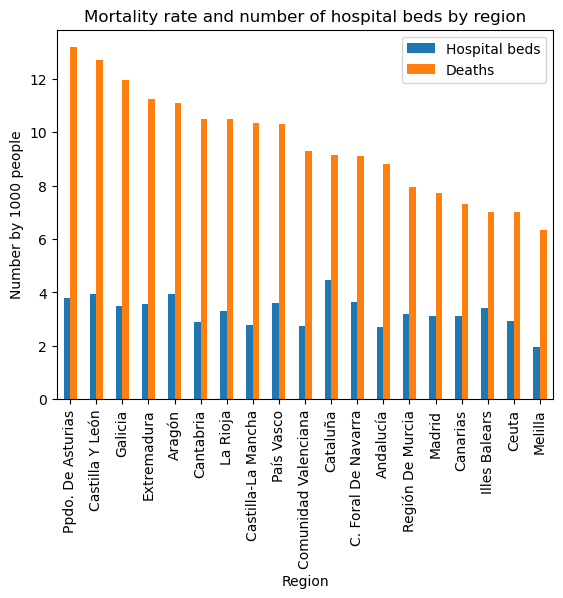

In [75]:
#Visual 1 - FILL IN
df_mort_bed = df_merge.set_index('region_name')[['Hospital beds (%.)', 'mortality_rate']]

df_mort_bed.sort_values(by=['mortality_rate'], ascending=False).plot(kind='bar', title = 'Mortality rate and number of hospital beds by region', ylabel='Number by 1000 people', xlabel='Region');
plt.legend(['Hospital beds', 'Deaths'])

*Answer to research question:* It is interesting that it seems to be no correlation between the number of deaths and total hospital beds by region. It would be good to take this into account in order to increase hospital resources in regions with a higher number of deaths.

We will look deeper into the correlation between these parameters

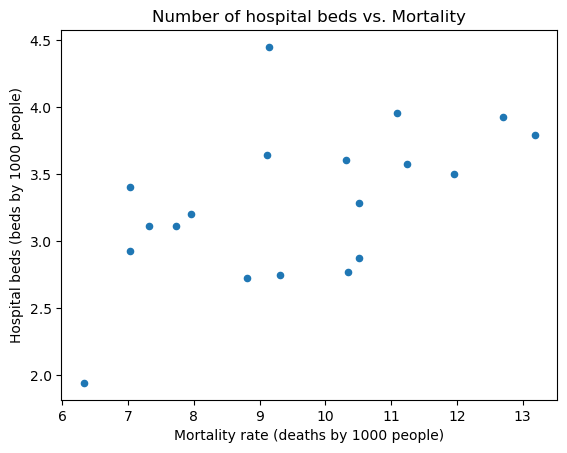

In [76]:
#Visual 2 - FILL IN
df_merge.plot.scatter(x='mortality_rate', y='Hospital beds (%.)', title= 'Number of hospital beds vs. Mortality', xlabel='Mortality rate (deaths by 1000 people)', ylabel='Hospital beds (beds by 1000 people)');

*Answer to research question:* We confirm that there is no correltion between both parameters 

### **5.2:** Reflection

In this proyect we did not look for outliers. Removing possible outliers would have lead us to more trustfull results. It would also be interesting to look deeper into the death causes in order not to take into account deaths related with deseases or accidents with no possibility of hospitalization. 

The number of beds in hospitals is only one indicator of the hospital resources, and by itself it does not determine the quality or even the quantity of hospital cares. For example, a big amount of beds in a hospital can be useless if there are not enough doctors or nurses to attend the patients, or if there is not much hospital equipment.

In [77]:
!jupyter nbconvert Data_Wrangling_Project_Starter.ipynb --to html

[NbConvertApp] Converting notebook Data_Wrangling_Project_Starter.ipynb to html
[NbConvertApp] Writing 1616946 bytes to Data_Wrangling_Project_Starter.html
